In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow import keras as kr
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import talos

import matplotlib.pyplot as plt

In [4]:
# upload & joint
emb = np.load('/root/work/data/emb_stad_exp32.npy')
label = pd.read_csv('/root/work/data/STAD/label_met_stad')

emb_size = emb.shape[1]
num_classes =len(label['Molecular.Subtype'].value_counts())

In [5]:
# data preprocessing
x = emb

# str -> int
y = np.array(label['Molecular.Subtype'].map({'CIN':0, 'GS':1, 'MSI':2, 'EBV':3}).astype(int))

# int -> onthot
def getOnehotLable(old_label, num_classes):
    num_labels = old_label.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + old_label.ravel()] = 1
    return labels_one_hot
    
y = getOnehotLable(y, num_classes)

In [6]:
seed = 2022
np.random.seed(seed)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=seed)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(195, 312640) (65, 312640) (195, 4) (65, 4)


In [7]:
model = Sequential()
model.add(Dense(2048, input_dim=train_x.shape[1], kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512,kernel_initializer='uniform',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model.add(Dense(num_classes,kernel_initializer='uniform',activation='softmax'))

model.compile(loss=kr.losses.CategoricalCrossentropy(), optimizer='sgd', metrics=['categorical_accuracy'])
sgd = optimizers.SGD(learning_rate=0.0001)

Epoch 1/50
2/2 [==============================] - 2s 1s/step - loss: 1.3384 - categorical_accuracy: 0.4615 - val_loss: 1.2162 - val_categorical_accuracy: 0.4769
Epoch 2/50
2/2 [==============================] - 2s 953ms/step - loss: 1.2412 - categorical_accuracy: 0.4974 - val_loss: 1.2687 - val_categorical_accuracy: 0.4000
Epoch 3/50
2/2 [==============================] - 2s 955ms/step - loss: 1.1731 - categorical_accuracy: 0.4821 - val_loss: 1.1921 - val_categorical_accuracy: 0.4462
Epoch 4/50
2/2 [==============================] - 2s 958ms/step - loss: 0.9883 - categorical_accuracy: 0.6513 - val_loss: 1.2416 - val_categorical_accuracy: 0.4462
Epoch 5/50
2/2 [==============================] - 2s 949ms/step - loss: 0.9418 - categorical_accuracy: 0.6256 - val_loss: 1.2345 - val_categorical_accuracy: 0.5231
Epoch 6/50
2/2 [==============================] - 2s 981ms/step - loss: 0.8673 - categorical_accuracy: 0.7231 - val_loss: 1.2599 - val_categorical_accuracy: 0.4462
Epoch 7/50
2/2 [===

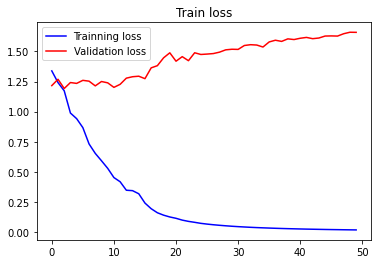

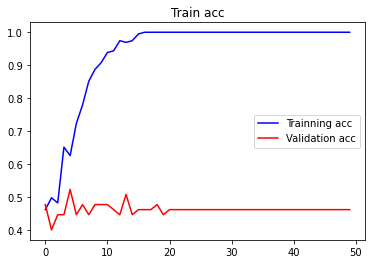

1/1 [==============================] - 1s 589ms/step - loss: 1.6586 - categorical_accuracy: 0.4615


In [8]:
b = 128
train_history=model.fit(train_x,
                        train_y,
                        epochs=50,
                        validation_data=(test_x, test_y),
                        batch_size=b)

loss=train_history.history['loss']
acc=train_history.history['categorical_accuracy']
epochs=range(0,len(loss))
plt.title("Train loss")
plt.plot(epochs,loss,'b',label='Trainning loss')
val_loss=train_history.history['val_loss']
val_acc=train_history.history['val_categorical_accuracy']
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend(loc='best')
plt.figure()
plt.title("Train acc")
plt.plot(epochs,acc,'b',label='Trainning acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend(loc='best')
plt.show()

scores=model.evaluate(test_x,test_y,batch_size=b)